# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading and cleaning the dataset

In [2]:
leads_data = pd.read_csv("C:\\Users\\GOOD HAPPY\\Downloads\\Lead Scoring Assignment\\Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Checking the dataframe

In [3]:
#Checking the summary of the dataframe
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
#Checking the spread of numerical values present in the data
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#Checking the no. of rows and columns in the dataframe
leads_data.shape

(9240, 37)

## Cleaning the dataframe

In [6]:
# Transforming all the values present in the dataframe to lower case
leads_data = leads_data.applymap(lambda v:v.lower() if type(v) == str else v)

In [7]:
# Checking the column wise null count
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

comments-
<br>
          - It can be seen that there are a lot of null values present in the dataframe.

In [8]:
# Replacing the 'Select' value with NaN as it symbolizes that no option has been selected
leads_data = leads_data.replace('select',np.nan)

In [9]:
# Checking the column wise null percentage
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Dropping the columns having more than 35% null values

In [10]:
# Dropping the columns having null values greater than 35% and checking the null value percentage once again
leads_data = leads_data.drop('Specialization', axis=1)
leads_data = leads_data.drop('How did you hear about X Education', axis=1)
leads_data = leads_data.drop('Tags', axis=1)
leads_data = leads_data.drop('Lead Quality', axis=1)
leads_data = leads_data.drop('Lead Profile', axis=1)
leads_data = leads_data.drop('City', axis=1)
leads_data = leads_data.drop('Asymmetrique Activity Index', axis=1)
leads_data = leads_data.drop('Asymmetrique Profile Index', axis=1)
leads_data = leads_data.drop('Asymmetrique Activity Score', axis=1)
leads_data = leads_data.drop('Asymmetrique Profile Score', axis=1)
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
# Checking the percentage occurrence of values in country
round((leads_data['Country'].value_counts()/leads_data['Country'].count())*100,2)

india                   95.77
united states            1.02
united arab emirates     0.78
singapore                0.35
saudi arabia             0.31
united kingdom           0.22
australia                0.19
qatar                    0.15
hong kong                0.10
bahrain                  0.10
oman                     0.09
france                   0.09
unknown                  0.07
south africa             0.06
nigeria                  0.06
germany                  0.06
kuwait                   0.06
canada                   0.06
sweden                   0.04
china                    0.03
asia/pacific region      0.03
uganda                   0.03
bangladesh               0.03
italy                    0.03
belgium                  0.03
netherlands              0.03
ghana                    0.03
philippines              0.03
russia                   0.01
switzerland              0.01
vietnam                  0.01
denmark                  0.01
tanzania                 0.01
liberia   

In [12]:
# Dropping the column Country as more than 95% of values in the column is india and it doesn't capture enough variance
leads_data = leads_data.drop('Country', axis=1)

In [13]:
#Checking the percentage occurrence of values in 'What matters most to you in choosing a course'
round((leads_data['What matters most to you in choosing a course'].value_counts()/leads_data['What matters most to you in choosing a course'].count())*100,2)

better career prospects      99.95
flexibility & convenience     0.03
other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

In [14]:
#Checking the percentage occurrence of values in 'What is your current occupation'
round((leads_data['What is your current occupation'].value_counts()/leads_data['What is your current occupation'].count())*100,2)

unemployed              85.50
working professional    10.78
student                  3.21
other                    0.24
housewife                0.15
businessman              0.12
Name: What is your current occupation, dtype: float64

In [15]:
#Removing above two columns as not much variance is being covered and also the null values are high in these columns.
leads_data = leads_data.drop('What matters most to you in choosing a course', axis=1)
leads_data = leads_data.drop('What is your current occupation', axis=1)

In [16]:
# Checking the null values percentage in rest of the columns
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [17]:
# Dropping the rows containing null values as the missing value percentage is quite low now
leads_data = leads_data[~np.isnan(leads_data['TotalVisits'])]
leads_data = leads_data[~np.isnan(leads_data['Page Views Per Visit'])]
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.32
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [18]:
# Removing the rows containing null values in the column 'Lead Source'
leads_data = leads_data[pd.notnull(leads_data['Lead Source'])]
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [19]:
# Checking the no. of rows and columns in the dataframe
leads_data.shape

(9074, 24)

#### All the null values have been dropped and still more than 98% of values are present in the dataframe

##### The rest of the columns which doesn't offer much variance will be dropped now

In [20]:
# Checking the column 'Do Not Email' for variance
round((leads_data['Do Not Email'].value_counts()/leads_data['Do Not Email'].count())*100,2)

no     92.11
yes     7.89
Name: Do Not Email, dtype: float64

In [21]:
# Checking the column 'Do Not Call' for variance
round((leads_data['Do Not Call'].value_counts()/leads_data['Do Not Call'].count())*100,2)

no     99.98
yes     0.02
Name: Do Not Call, dtype: float64

In [22]:
# Checking the column 'Search' for variance
round((leads_data['Search'].value_counts()/leads_data['Search'].count())*100,2)

no     99.85
yes     0.15
Name: Search, dtype: float64

In [23]:
# Checking the column 'Magzine' for variance
round((leads_data['Magazine'].value_counts()/leads_data['Magazine'].count())*100,2)

no    100.0
Name: Magazine, dtype: float64

In [24]:
# Checking the column 'Newspaper Article' for variance
round((leads_data['Newspaper Article'].value_counts()/leads_data['Newspaper Article'].count())*100,2)

no     99.98
yes     0.02
Name: Newspaper Article, dtype: float64

In [25]:
# Checking the column 'X Education Forums' for variance
round((leads_data['X Education Forums'].value_counts()/leads_data['X Education Forums'].count())*100,2)

no     99.99
yes     0.01
Name: X Education Forums, dtype: float64

In [26]:
# Checking the column 'Newspaper' for variance
round((leads_data['Newspaper'].value_counts()/leads_data['Newspaper'].count())*100,2)

no     99.99
yes     0.01
Name: Newspaper, dtype: float64

In [27]:
# Checking the column 'Digital Advertisement' for variance
round((leads_data['Digital Advertisement'].value_counts()/leads_data['Digital Advertisement'].count())*100,2)

no     99.96
yes     0.04
Name: Digital Advertisement, dtype: float64

In [28]:
# Checking the column 'Through Recommendations' for variance
round((leads_data['Through Recommendations'].value_counts()/leads_data['Through Recommendations'].count())*100,2)

no     99.92
yes     0.08
Name: Through Recommendations, dtype: float64

In [29]:
# Checking the column 'Receive More Updates About Our Courses' for variance
round((leads_data['Receive More Updates About Our Courses'].value_counts()/leads_data['Receive More Updates About Our Courses'].count())*100,2)

no    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [30]:
#Checking the column 'Update me on Supply Chain Content' for variance
round((leads_data['Update me on Supply Chain Content'].value_counts()/leads_data['Update me on Supply Chain Content'].count())*100,2)

no    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [31]:
#Checking the column 'I agree to pay the amount through cheque' for variance
round((leads_data['I agree to pay the amount through cheque'].value_counts()/leads_data['I agree to pay the amount through cheque'].count())*100,2)

no    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [32]:
#Checking the column 'Get updates on DM Content' for variance
round((leads_data['Get updates on DM Content'].value_counts()/leads_data['Get updates on DM Content'].count())*100,2)

no    100.0
Name: Get updates on DM Content, dtype: float64

In [33]:
#Checking the column 'A free copy of Mastering The Interview' for variance
round((leads_data['A free copy of Mastering The Interview'].value_counts()/leads_data['A free copy of Mastering The Interview'].count())*100,2)

no     68.17
yes    31.83
Name: A free copy of Mastering The Interview, dtype: float64

##### Dropping all the columns which doesn't offer much variance

In [34]:
leads_data = leads_data.drop('Do Not Call', axis=1)
leads_data = leads_data.drop('Search', axis=1)
leads_data = leads_data.drop('Magazine', axis=1)
leads_data = leads_data.drop('Newspaper Article', axis=1)
leads_data = leads_data.drop('X Education Forums', axis=1)
leads_data = leads_data.drop('Newspaper', axis=1)
leads_data = leads_data.drop('Digital Advertisement', axis=1)
leads_data = leads_data.drop('Through Recommendations', axis=1)
leads_data = leads_data.drop('Receive More Updates About Our Courses', axis=1)
leads_data = leads_data.drop('Update me on Supply Chain Content', axis=1)
leads_data = leads_data.drop('Get updates on DM Content', axis=1)
leads_data = leads_data.drop('I agree to pay the amount through cheque', axis=1)

In [35]:
# Checking out the data frame now
leads_data.shape

(9074, 12)

In [36]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,0,0.0,0,0.0,page visited on website,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,0,5.0,674,2.5,email opened,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,1,2.0,1532,2.0,email opened,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,0,1.0,305,1.0,unreachable,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,1,2.0,1428,1.0,converted to lead,no,modified


In [37]:
# Transforming yes to 1 and no to 0
leads_data['Do Not Email'] = leads_data['Do Not Email'].map({'yes': 1, 'no': 0})
leads_data['A free copy of Mastering The Interview'] = leads_data['A free copy of Mastering The Interview'].map({'yes': 1, 'no': 0})
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,0,0,0.0,0,0.0,page visited on website,0,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,0,0,5.0,674,2.5,email opened,0,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,1,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,0,0,1.0,305,1.0,unreachable,0,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,0,1,2.0,1428,1.0,converted to lead,0,modified


#### Checking for duplicates

In [38]:
# Prospect ID will be dropped as both prospect id and lead number are unique and lead number will be considered as key here for evaluation
leads_data = leads_data.drop('Prospect ID', axis=1)

In [40]:
print(any(leads_data['Lead Number'].duplicated())) 

False


# EDA

In [41]:
# Checking out the dataframe after data cleaning
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   int64  
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   int64  
 10  Last Notable Activity                   9074 non-null   obje

## Checking out the categorical variables

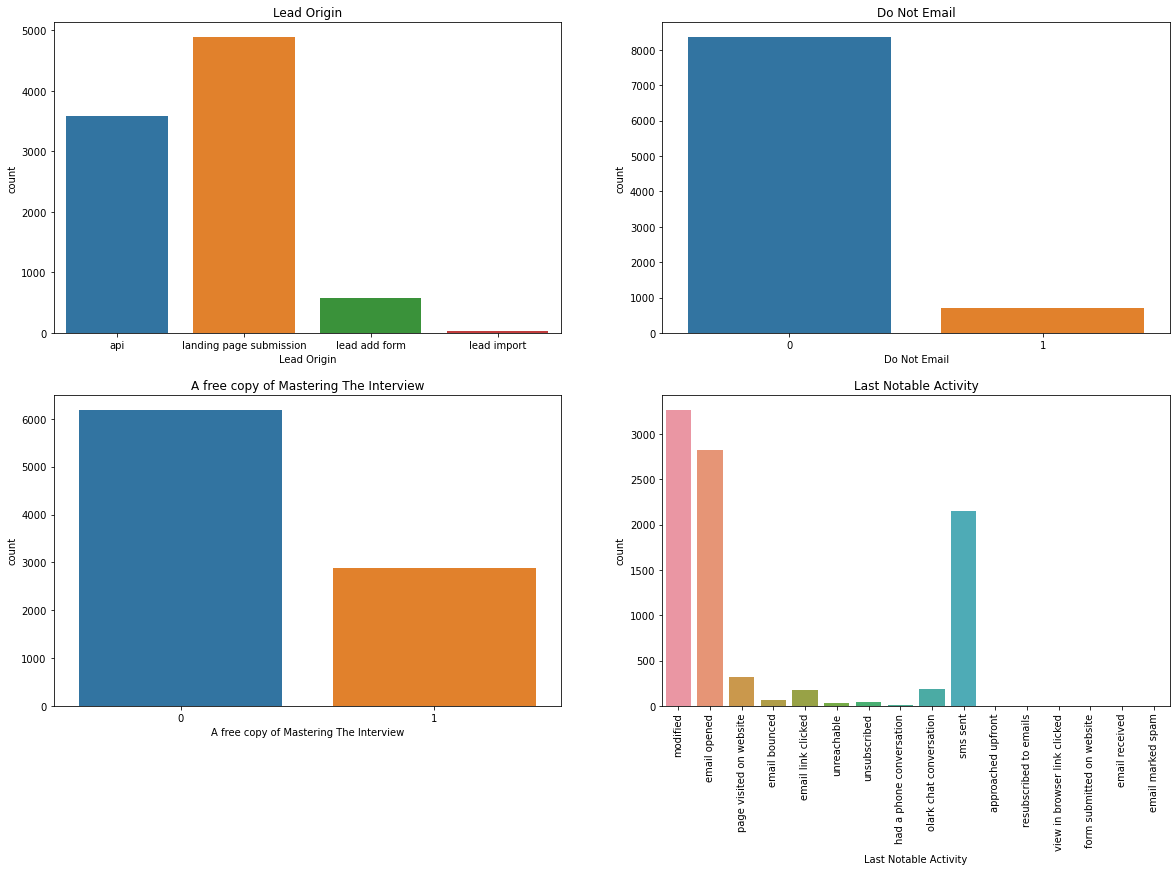

In [46]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads_data['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads_data['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads_data['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,4)
sns.countplot(leads_data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()


Comments-<br>
       
         - The distribution of data among each column can be easily seen over here.

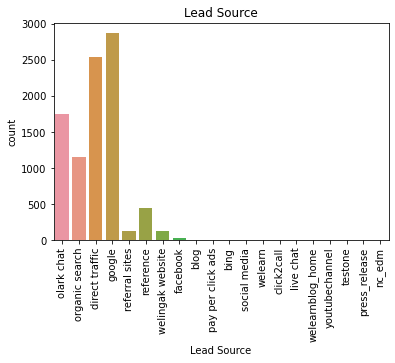

In [47]:
sns.countplot(leads_data['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

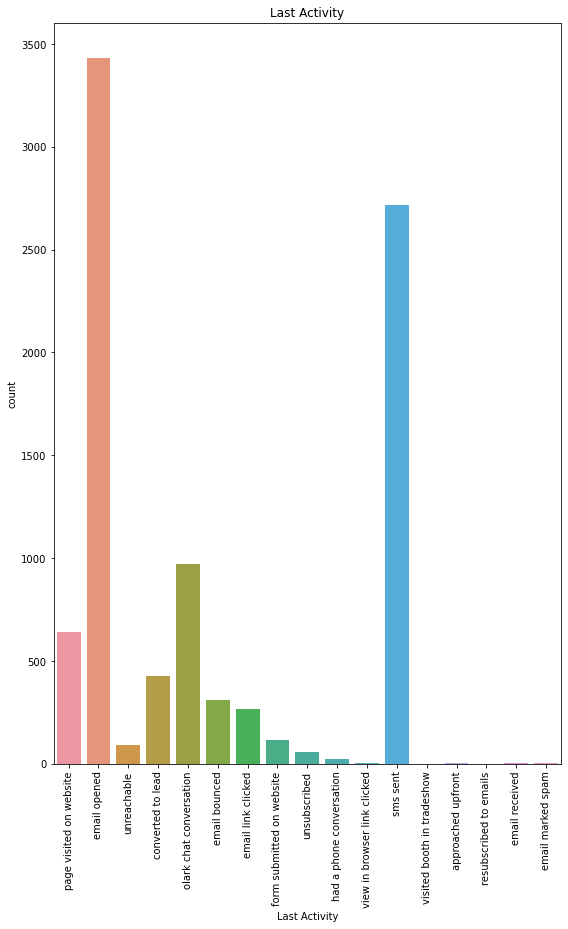

In [48]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(leads_data['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

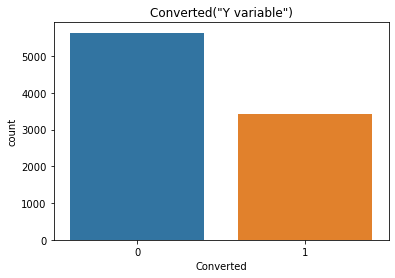

In [50]:
sns.countplot(leads_data['Converted'])
plt.title('Converted("Y variable")')
plt.show()

## Checking out the numerical variables

In [51]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   int64  
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   int64  
 10  Last Notable Activity                   9074 non-null   obje

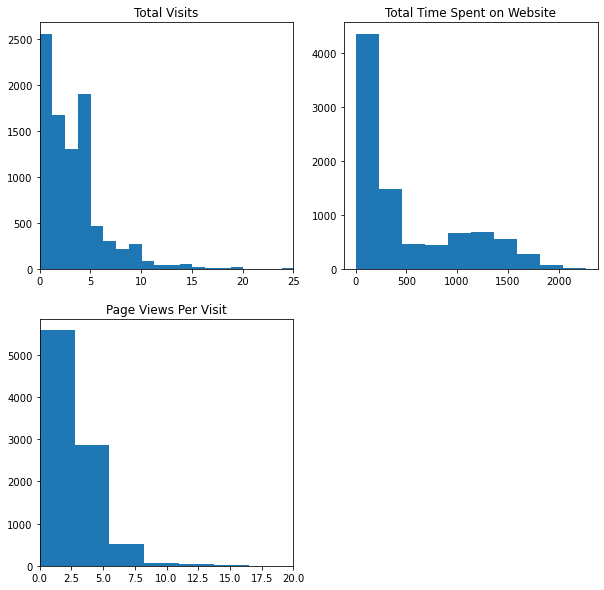

In [53]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(leads_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(leads_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(leads_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

Comments-<br>
         
         - The distribution of data points in these columns can be easily seen over here.

## Relating the categorical variables to the target variable

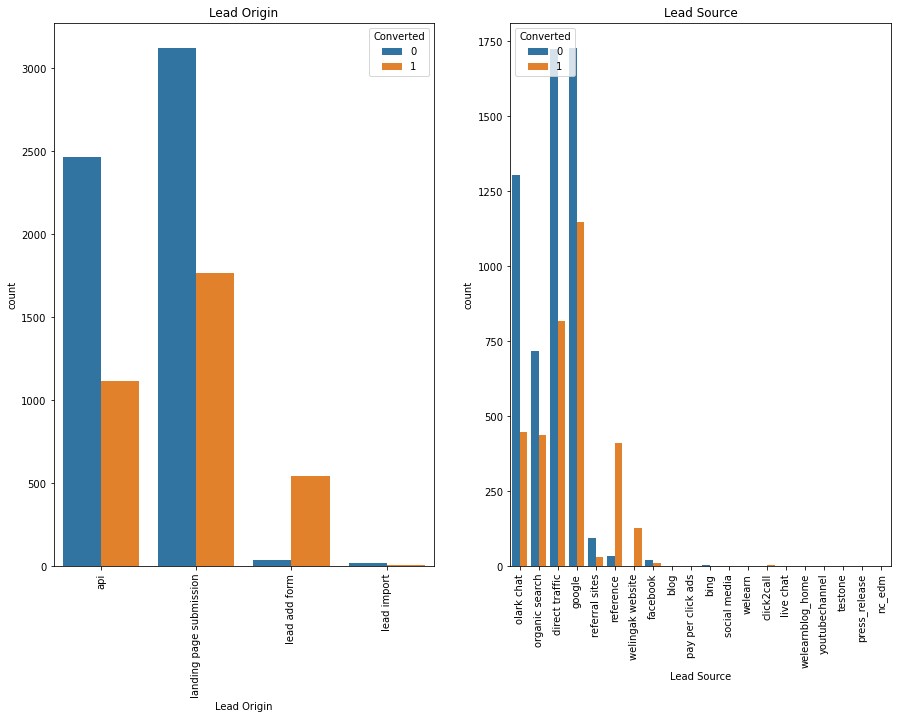

In [54]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

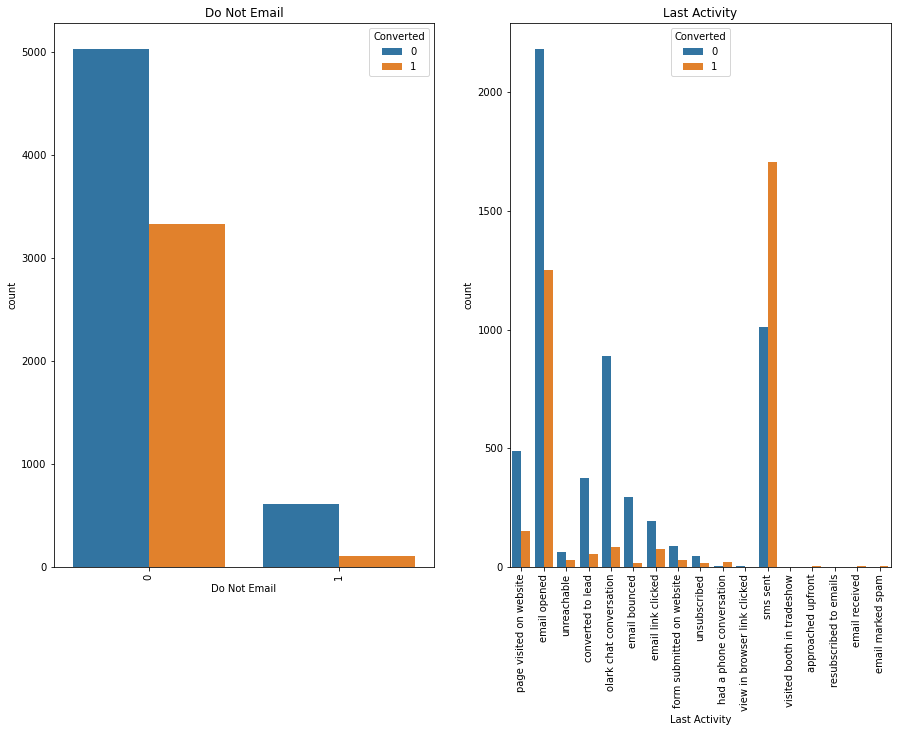

In [58]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Last Activity', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()



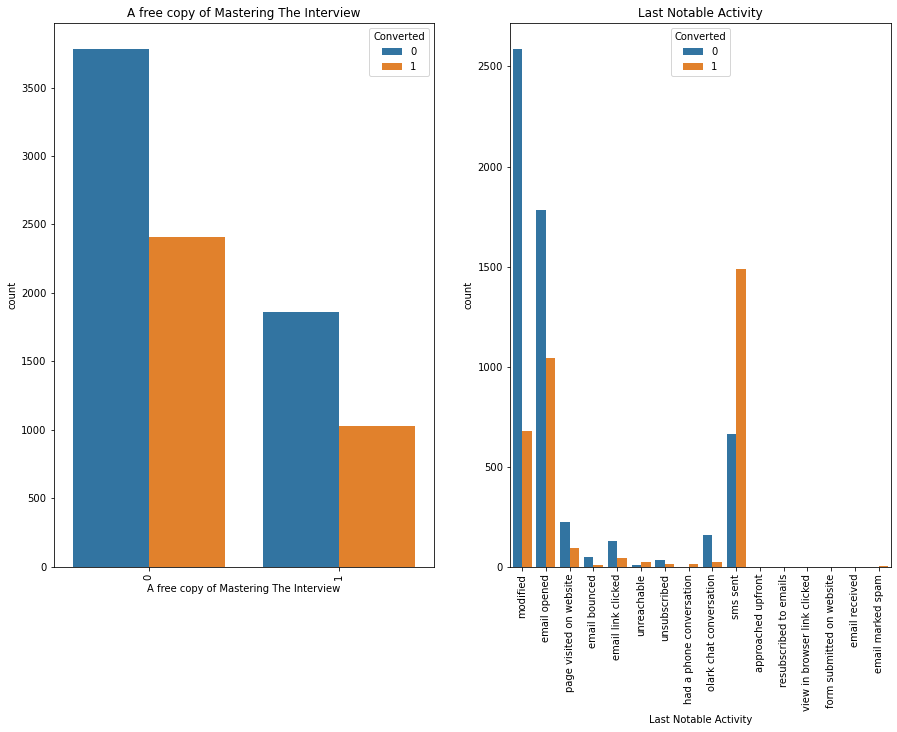

In [60]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()


## Checking for correlation among numerical variables

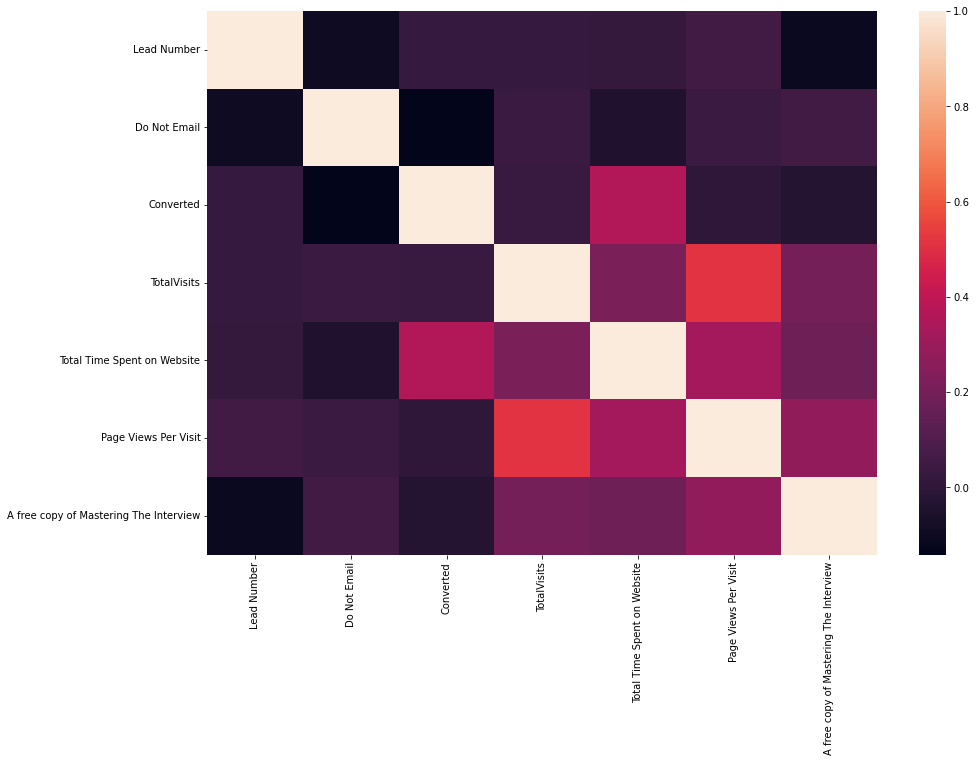

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(leads_data.corr())
plt.show()

Comments-<br>
         
         - It can be seen that there isn't too much correlation among the data.

## Checking for outliers in the continuous variables

In [62]:
numerical = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [63]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
numerical.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


Comments-<br>
         - It can be seen that some outliers are present in the column 'TotalVisits' and 'Page View Per Visit' and these outliers needs to be treated.

In [65]:
filtering_cols= leads_data[['TotalVisits','Page Views Per Visit']]
low = .00
high = .99
quantified = filtering_cols.quantile([low, high])
quantified

,TotalVisits,Page Views Per Visit
0.00,0.0,0.0
0.99,17.0,9.0


In [66]:
filtering_cols = filtering_cols.apply(lambda x: x[(x>=quantified.loc[low,x.name]) & 
                                    (x <= quantified.loc[high,x.name])], axis=0)

In [67]:
#Merging it with the leads_data dataframe
leads_data = pd.concat([leads_data.loc[:, ~leads_data.columns.isin(['TotalVisits','Page Views Per Visit'])], filtering_cols], axis=1)

## Creating dummy variables for categorical variables having more than 2 values

In [68]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
lead_origin = pd.get_dummies(leads_data['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lead_origin],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
lead_source = pd.get_dummies(leads_data['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lead_source],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
last_activity = pd.get_dummies(leads_data['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,last_activity],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
last_notble_activity = pd.get_dummies(leads_data['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,last_notble_activity],axis=1)

In [69]:
leads_data.shape

(9074, 64)

In [70]:
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,TotalVisits,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,api,olark chat,0,0,0,page visited on website,0,modified,0.0,...,0,0,1,0,0,0,0,0,0,0
1,660728,api,organic search,0,0,674,email opened,0,email opened,5.0,...,0,0,0,0,0,0,0,0,0,0
2,660727,landing page submission,direct traffic,0,1,1532,email opened,1,email opened,2.0,...,0,0,0,0,0,0,0,0,0,0
3,660719,landing page submission,direct traffic,0,0,305,unreachable,0,modified,1.0,...,0,0,1,0,0,0,0,0,0,0
4,660681,landing page submission,google,0,1,1428,converted to lead,0,modified,2.0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
#Dropping original features.
leads_data = leads_data.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'], axis=1)

In [73]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         9074 non-null   int64  
 1   Do Not Email                                        9074 non-null   int64  
 2   Converted                                           9074 non-null   int64  
 3   Total Time Spent on Website                         9074 non-null   int64  
 4   A free copy of Mastering The Interview              9074 non-null   int64  
 5   TotalVisits                                         8991 non-null   float64
 6   Page Views Per Visit                                8999 non-null   float64
 7   Lead Origin_landing page submission                 9074 non-null   uint8  
 8   Lead Origin_lead add form                           9074 non-null   uint8  
 9

In [74]:
#Dropping NA values
leads_data.dropna(inplace=True)
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         8924 non-null   int64  
 1   Do Not Email                                        8924 non-null   int64  
 2   Converted                                           8924 non-null   int64  
 3   Total Time Spent on Website                         8924 non-null   int64  
 4   A free copy of Mastering The Interview              8924 non-null   int64  
 5   TotalVisits                                         8924 non-null   float64
 6   Page Views Per Visit                                8924 non-null   float64
 7   Lead Origin_landing page submission                 8924 non-null   uint8  
 8   Lead Origin_lead add form                           8924 non-null   uint8  
 9

In [75]:
# Checking the outliers at 25%,50%,75%,90%,95% and 99%
numerical2 = leads_data[['TotalVisits','Page Views Per Visit']]
numerical2.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Page Views Per Visit
count,8924.000000,8924.00000
mean,3.153070,2.27400
std,2.903138,1.89403
min,0.000000,0.00000
25%,1.000000,1.00000
50%,3.000000,2.00000
75%,5.000000,3.00000
90%,7.000000,5.00000
95%,9.000000,6.00000
99%,13.000000,8.00000


## Checking for variance among dummy variables

In [76]:
variance = round(100*((len(leads_data.index)-leads_data.loc[:, ~leads_data.columns.isin(['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit'])].sum())/len(leads_data.index)), 2)
data_frame = pd.DataFrame(variance,columns=['values'])
data_frame

,values
Do Not Email,92.28
Converted,62.25
A free copy of Mastering The Interview,68.65
Lead Origin_landing page submission,46.57
Lead Origin_lead add form,93.50
Lead Origin_lead import,99.66
Lead Source_blog,99.99
Lead Source_click2call,99.96
Lead Source_direct traffic,72.00
Lead Source_facebook,99.65


Comments-<br>
       - It can be seen that most of the columns don't capture any variance. So, we'll drop the columns having around 99% same values.

In [77]:
column = (data_frame[data_frame['values'] > 98.50]).index.values.tolist()  
column

['Lead Origin_lead import',
 'Lead Source_blog',
 'Lead Source_click2call',
 'Lead Source_facebook',
 'Lead Source_live chat',
 'Lead Source_nc_edm',
 'Lead Source_pay per click ads',
 'Lead Source_press_release',
 'Lead Source_referral sites',
 'Lead Source_social media',
 'Lead Source_testone',
 'Lead Source_welearn',
 'Lead Source_welearnblog_home',
 'Lead Source_welingak website',
 'Lead Source_youtubechannel',
 'Last Activity_email marked spam',
 'Last Activity_email received',
 'Last Activity_form submitted on website',
 'Last Activity_had a phone conversation',
 'Last Activity_resubscribed to emails',
 'Last Activity_unreachable',
 'Last Activity_unsubscribed',
 'Last Activity_view in browser link clicked',
 'Last Activity_visited booth in tradeshow',
 'Last Notable Activity_email bounced',
 'Last Notable Activity_email marked spam',
 'Last Notable Activity_email received',
 'Last Notable Activity_form submitted on website',
 'Last Notable Activity_had a phone conversation',
 'L

In [78]:
# Dropping all columns which do not capture any variance
leads_data = leads_data.drop(column, 1)

In [79]:
leads_data.shape

(8924, 27)

In [80]:
leads_data.head()

,Lead Number,Do Not Email,Converted,Total Time Spent on Website,A free copy of Mastering The Interview,TotalVisits,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_direct traffic,...,Last Activity_email opened,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,660737,0,0,0,0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,660728,0,0,674,0,5.0,2.5,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,660727,0,1,1532,1,2.0,2.0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,660719,0,0,305,0,1.0,1.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,1,1428,0,2.0,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Checking the lead conversion rate

In [82]:
converted_leads = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
converted_leads

37.75212909009413

Comments-<br>
         - It can be sseen that in the dataframe,the leads conversion rate is around 38%. We can proceed to model building now.

# Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [86]:
X = leads_data.drop(['Converted', 'Lead Number'], 1)
X.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,TotalVisits,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,...,Last Activity_email opened,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0,0,0,0.0,0.0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,0,674,0,5.0,2.5,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,1532,1,2.0,2.0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,305,0,1.0,1.0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1428,0,2.0,1.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [85]:
# Putting the target variable in y
y = leads_data['Converted']
y.head() 

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [88]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,TotalVisits,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,...,Last Activity_email opened,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
8823,0,0.524648,0,0.235294,0.444444,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
7671,0,0.000000,0,0.000000,0.000000,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1371,0,0.706866,0,0.117647,0.222222,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3143,0,0.000000,0,0.000000,0.000000,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1376,0,0.081426,0,0.235294,0.444444,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


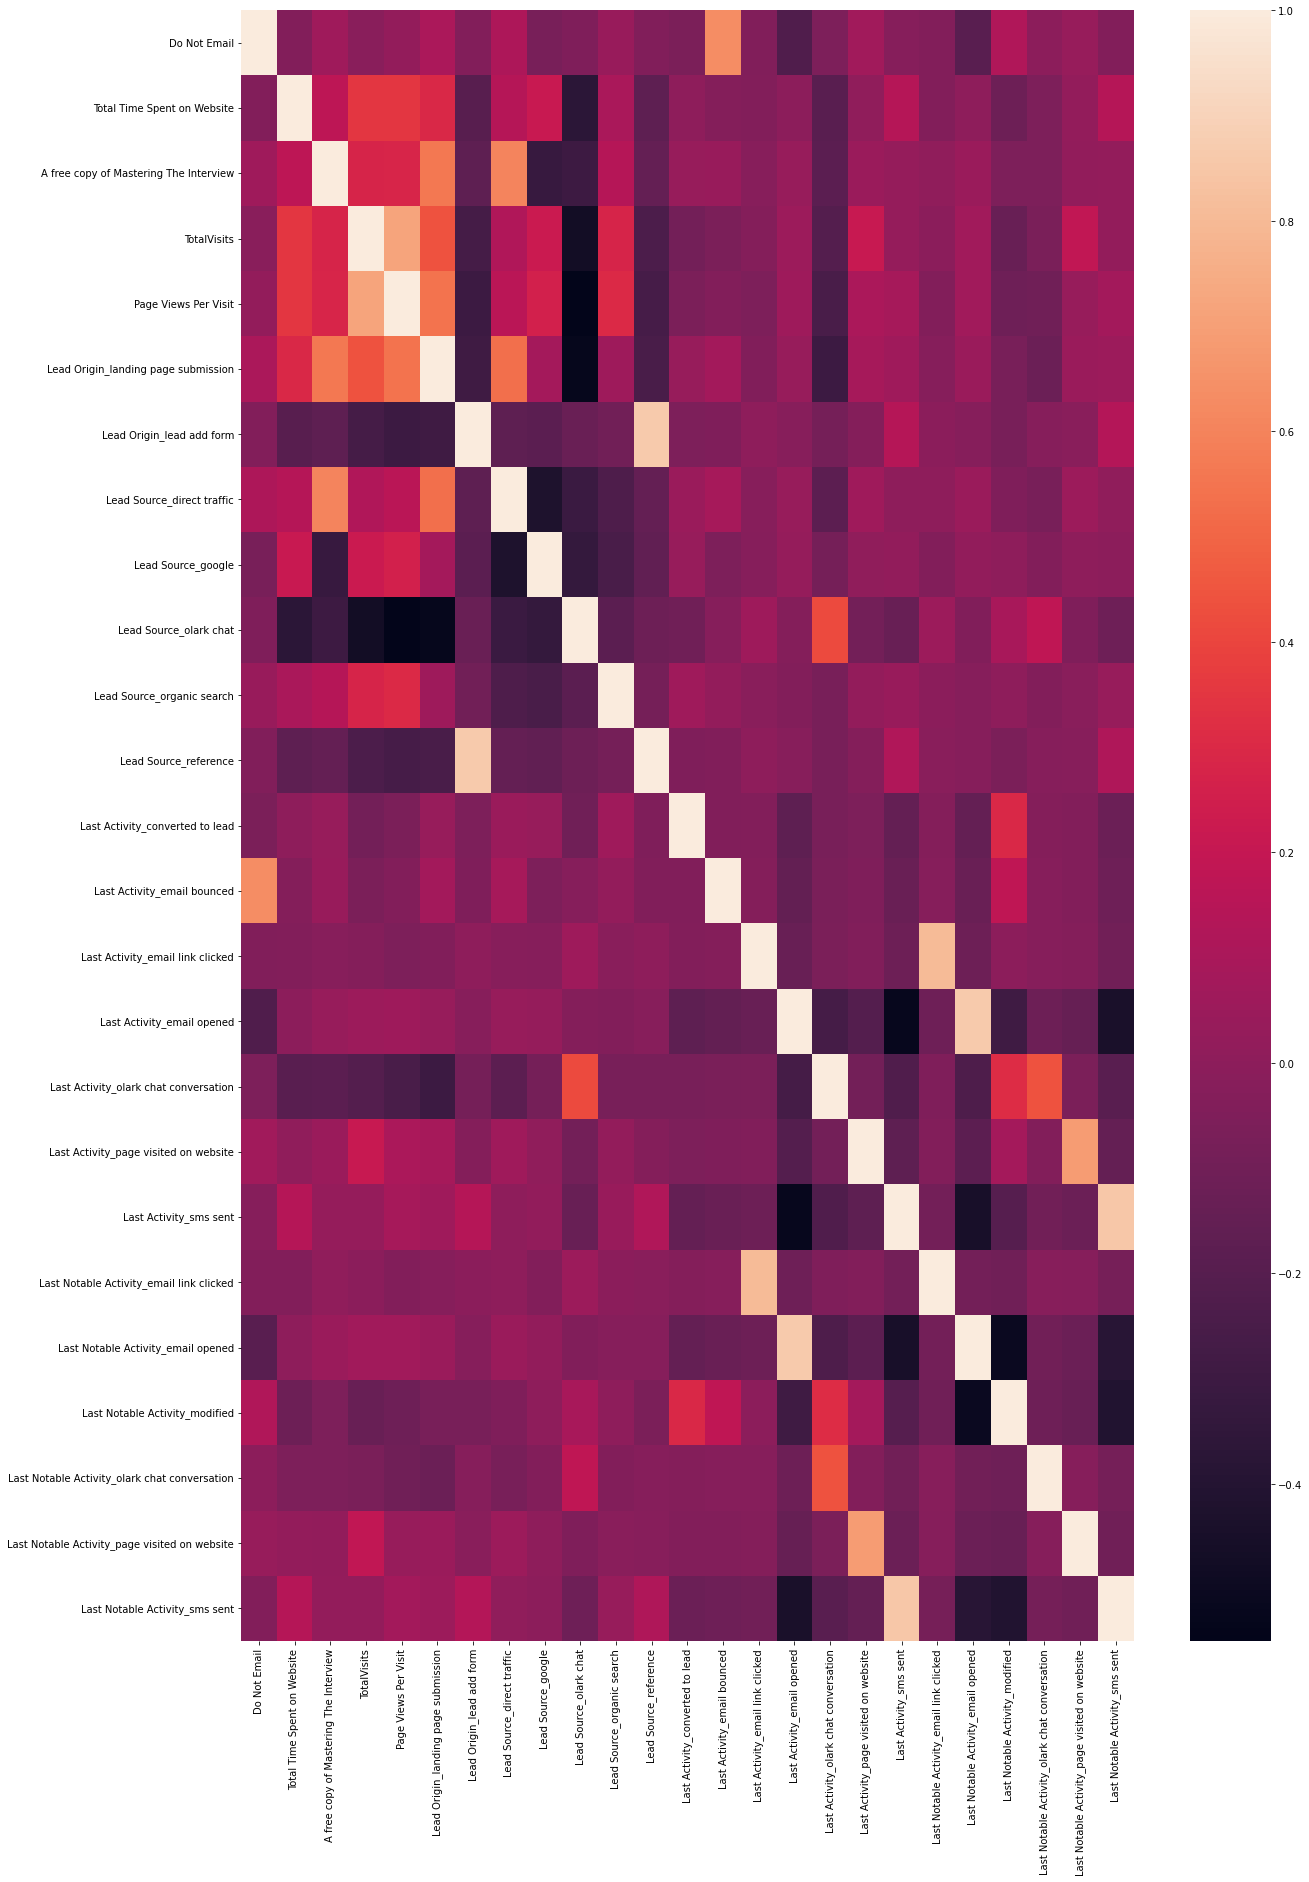

In [89]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

Comments-<br>
         - Some correlations can be observed. So, the top variables needs to be selected using RFE.

# Model Building

In [90]:
# Importing 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [91]:
# Importing RFE
from sklearn.feature_selection import RFE

In [92]:
# Running RFE to select top 15 variables
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [93]:
# Checking out the features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 8),
 ('TotalVisits', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 10),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Source_direct traffic', False, 2),
 ('Lead Source_google', False, 4),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 3),
 ('Lead Source_reference', False, 7),
 ('Last Activity_converted to lead', True, 1),
 ('Last Activity_email bounced', True, 1),
 ('Last Activity_email link clicked', False, 9),
 ('Last Activity_email opened', False, 6),
 ('Last Activity_olark chat conversation', True, 1),
 ('Last Activity_page visited on website', True, 1),
 ('Last Activity_sms sent', False, 5),
 ('Last Notable Activity_email link clicked', True, 1),
 ('Last Notable Activity_email opened', True, 1),
 ('Last Notable Activity_modified', True, 1),
 ('Last Notable Activity_olark chat conve

In [94]:
# Putting all the columns selected by RFE in the variable 'imp'
imp = X_train.columns[rfe.support_]

Comments-<br>
         All the top features have been selected using RFE. Now it's time to look after the P- Value and VIF.

In [95]:
# Selecting columns selected by RFE
X_train = X_train[imp]

In [96]:
# Importing statsmodels
import statsmodels.api as sm

In [97]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.9
Date:                Mon, 17 Oct 2022   Deviance:                       5393.8
Time:                        19:09:28   Pearson chi2:                 6.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6414      0.114     -5.606      0.000      -0.866      -0.417
Do Not Email                                     -1.5410      0.194     -7.934      0.000      -1.922      -1.160
Total Time Spent on Website                       4.7817      0.167     28.636      0.000       4.454       5.109
TotalVisits                                       1.6742      0.288      5.803      0.000       1.109       2.240
Page Views Per Visit                             -1.1876      0.254     -4.679      0.000      -1.685      -0.690
Lead Origin_lead add form                         4.5301      0.235     19.293      0.000       4.070       4.990
Lead Source_olark chat                            1.1197      0.125      8.983      0.000       0.875       1.364
Last Activity_converted to lead                  -1.1697      0.224     -5.227      0.000      -1.608      -0.731
Last Activity_email bounced                      -1.0153      0.357     -2.847      0.004      -1.714      -0.316
Last Activity_olark chat conversation            -1.5700      0.201     -7.796      0.000      -1.965      -1.175
Last Activity_page visited on website            -0.6998      0.237     -2.949      0.003      -1.165      -0.235
Last Notable Activity_email link clicked         -1.9832      0.254     -7.802      0.000      -2.481      -1.485
Last Notable Activity_email opened               -1.4526      0.087    -16.765      0.000      -1.622      -1.283
Last Notable Activity_modified                   -1.6331      0.103    -15.870      0.000      -1.835      -1.431
Last Notable Activity_olark chat conversation    -1.8648      0.395     -4.717      0.000      -2.640      -1.090
Last Notable Activity_page visited on website    -1.3674      0.317     -4.317      0.000      -1.988      -0.747
=================================================================================================================
"""

In [98]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
# Creating a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,Page Views Per Visit,5.15
2,TotalVisits,4.95
12,Last Notable Activity_modified,2.82
9,Last Activity_page visited on website,2.41
14,Last Notable Activity_page visited on website,2.28
8,Last Activity_olark chat conversation,2.12
1,Total Time Spent on Website,1.96
0,Do Not Email,1.87
7,Last Activity_email bounced,1.86
11,Last Notable Activity_email opened,1.78


Comments-<br>
         - All the P Values look fine but VIF values aren't. So, the column 'Page Views Per Visit' needs to be removed.

In [100]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [101]:
# Refitting the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.0
Date:                Mon, 17 Oct 2022   Deviance:                       5416.0
Time:                        19:17:40   Pearson chi2:                 6.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9020      0.100     -9.002      0.000      -1.098      -0.706
Do Not Email                                     -1.5580      0.194     -8.051      0.000      -1.937      -1.179
Total Time Spent on Website                       4.7773      0.167     28.644      0.000       4.450       5.104
TotalVisits                                       0.9852      0.248      3.975      0.000       0.499       1.471
Lead Origin_lead add form                         4.7628      0.230     20.717      0.000       4.312       5.213
Lead Source_olark chat                            1.3457      0.116     11.634      0.000       1.119       1.572
Last Activity_converted to lead                  -1.0880      0.223     -4.876      0.000      -1.525      -0.651
Last Activity_email bounced                      -0.9335      0.355     -2.631      0.009      -1.629      -0.238
Last Activity_olark chat conversation            -1.5433      0.201     -7.676      0.000      -1.937      -1.149
Last Activity_page visited on website            -0.6867      0.235     -2.916      0.004      -1.148      -0.225
Last Notable Activity_email link clicked         -1.9118      0.251     -7.603      0.000      -2.405      -1.419
Last Notable Activity_email opened               -1.4245      0.086    -16.536      0.000      -1.593      -1.256
Last Notable Activity_modified                   -1.6099      0.103    -15.699      0.000      -1.811      -1.409
Last Notable Activity_olark chat conversation    -1.8348      0.395     -4.641      0.000      -2.610      -1.060
Last Notable Activity_page visited on website    -1.2226      0.312     -3.914      0.000      -1.835      -0.610
=================================================================================================================
"""

In [102]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_modified,2.71
2,TotalVisits,2.59
8,Last Activity_page visited on website,2.41
13,Last Notable Activity_page visited on website,2.27
7,Last Activity_olark chat conversation,2.12
1,Total Time Spent on Website,1.88
6,Last Activity_email bounced,1.85
0,Do Not Email,1.84
10,Last Notable Activity_email opened,1.68
4,Lead Source_olark chat,1.66


comments-<br>
        - All the P values and VIF values look fine. So, we can fix this as our final model.

# Making Predictions

In [103]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8823    0.556330
7671    0.050480
1371    0.762488
3143    0.062411
1376    0.070581
8477    0.172492
385     0.197402
8918    0.623252
7600    0.147699
1090    0.710199
dtype: float64

In [104]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.5563302 , 0.05047959, 0.76248814, 0.06241072, 0.07058067,
       0.17249208, 0.19740177, 0.62325155, 0.14769919, 0.71019945])

In [105]:
# Data frame with given convertion rate and probablity of predicted ones and using 'Lead Number' as the identifier
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,1,0.556330,8823
1,0,0.050480,7671
2,1,0.762488,1371
3,0,0.062411,3143
4,0,0.070581,1376


In [107]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead Score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100,0))
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted,Lead Score
0,1,0.556330,8823,1,56.0
1,0,0.050480,7671,0,5.0
2,1,0.762488,1371,1,76.0
3,0,0.062411,3143,0,6.0
4,0,0.070581,1376,0,7.0


# Model Evaluation

In [108]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [109]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3398,  474],
       [ 739, 1635]], dtype=int64)

In [110]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8057957092539225

Comments-<br>
         - The accuracy over here is around 81% which is quite good.

In [111]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [112]:
# Calculating the sensitivity
TP/(TP+FN)

0.6887110362257792

In [113]:
# Calculating the specificity
TN/(TN+FP)

0.8775826446280992

Comments- <br>
         
         - It can be seen that with the current cut off of 0.5, the accuracy is around 81%, sensitivity is around 69% and                  specificity is around 88%.

# Optimising cut off using ROC Curve

In [114]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

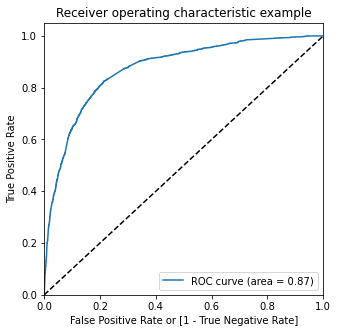

In [116]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Comments-<br>
          - The area under curve is 0.87 which is a nice value.

In [117]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.556330,8823,1,56.0,1,1,1,1,1,1,0,0,0,0
1,0,0.050480,7671,0,5.0,1,0,0,0,0,0,0,0,0,0
2,1,0.762488,1371,1,76.0,1,1,1,1,1,1,1,1,0,0
3,0,0.062411,3143,0,6.0,1,0,0,0,0,0,0,0,0,0
4,0,0.070581,1376,0,7.0,1,0,0,0,0,0,0,0,0,0


In [118]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.380083,1.000000,0.000000
0.1,0.1,0.572847,0.972620,0.327738
0.2,0.2,0.731028,0.912805,0.619576
0.3,0.3,0.798111,0.828981,0.779184
0.4,0.4,0.806916,0.764954,0.832645
0.5,0.5,0.805796,0.688711,0.877583
0.6,0.6,0.797150,0.606150,0.914256
0.7,0.7,0.766571,0.470093,0.948347
0.8,0.8,0.743196,0.377843,0.967200
0.9,0.9,0.705411,0.248526,0.985537


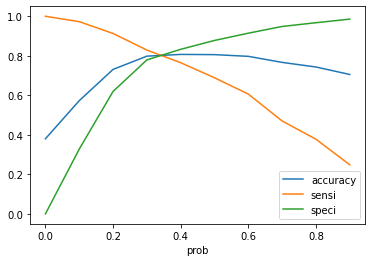

In [119]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Comments-<br>
        - After checking the graph and as per the requirement of client (target lead conversion rate to be around 80%), we'll take the cutoff as 0.3.

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.556330,8823,1,56.0,1,1,1,1,1,1,0,0,0,0,1
1,0,0.050480,7671,0,5.0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.762488,1371,1,76.0,1,1,1,1,1,1,1,1,0,0,1
3,0,0.062411,3143,0,6.0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.070581,1376,0,7.0,1,0,0,0,0,0,0,0,0,0,0


In [121]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.79811079090618

In [122]:
# Forming confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3017,  855],
       [ 406, 1968]], dtype=int64)

In [123]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [124]:
# Calculating the sensitivity
TP/(TP+FN)

0.8289806234203876

In [141]:
# Calculating the specificity
TN/(TN+FP)

0.77918388429


Comments-<br>
         - With the current cut off of 0.3, it can be seen that the accuracy is around 80%, the sensitivity is around 83% and the specificity is around 78%.

# Prediction on Test data

In [126]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [127]:
# Substituting all the columns in the final train model
imp = X_train.columns

In [128]:
# Select the columns in X_train for X_test as well
X_test = X_test[imp]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[imp])
X_test_sm

,const,Do Not Email,Total Time Spent on Website,TotalVisits,Lead Origin_lead add form,Lead Source_olark chat,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
6732,1.0,0,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0
6828,1.0,0,0.184859,0.647059,0,0,0,0,0,0,0,1,0,0,0
7751,1.0,0,0.209947,0.176471,0,0,0,0,0,1,0,0,1,0,0
279,1.0,0,0.191901,0.235294,0,0,0,0,0,0,1,0,0,0,0
4742,1.0,0,0.484595,0.176471,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1.0,0,0.720951,0.235294,0,0,0,0,0,0,0,1,0,0,0
2003,1.0,0,0.023768,0.058824,0,0,1,0,0,0,0,0,1,0,0
2147,1.0,0,0.502201,0.411765,0,0,0,0,1,0,0,0,0,1,0
1330,1.0,0,0.125440,0.294118,0,0,0,0,0,0,0,1,0,0,0


In [130]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
# Using 'Lead Number' as an index position
y_pred_final['Lead Number'] = y_test.index
y_pred_final

,Converted,Conversion_Prob,Lead Number
0,0,0.272742,6732
1,0,0.308777,6828
2,0,0.116936,7751
3,0,0.159057,279
4,1,0.830183,4742
...,...,...,...
2673,0,0.794059,124
2674,0,0.031417,2003
2675,1,0.186146,2147
2676,0,0.191942,1330


In [133]:
# Making prediction using cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Lead Score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100,0))
y_pred_final.head()

,Converted,Conversion_Prob,Lead Number,final_predicted,Lead Score
0,0,0.272742,6732,0,27.0
1,0,0.308777,6828,1,31.0
2,0,0.116936,7751,0,12.0
3,0,0.159057,279,0,16.0
4,1,0.830183,4742,1,83.0


In [134]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7781926811053025

In [135]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1274,  409],
       [ 185,  810]], dtype=int64)

In [136]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [143]:
# Calculating the sensitivity
TP/(TP+FN)

0.8140703517587939

In [142]:
# Calculating the specificity
TN/(TN+FP)

0.7569815805109923

In [144]:
# Calculating the precison
TP/(TP+FP)

0.6644790812141099

## Precision and Recall

In [145]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3017,  855],
       [ 406, 1968]], dtype=int64)

In [146]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6971307120085016

In [147]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8289806234203876

Comments-<br>
          With the current cut off of 0.3, the precision is around 70% and recall is around 83%.

## Precision and Recall Tradeoff

In [148]:
from sklearn.metrics import precision_recall_curve

In [149]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    1
 6243    0
 6244    0
 6245    1
 Name: Converted, Length: 6246, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    1
 6243    0
 6244    0
 6245    0
 Name: final_predicted, Length: 6246, dtype: int64)

In [150]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

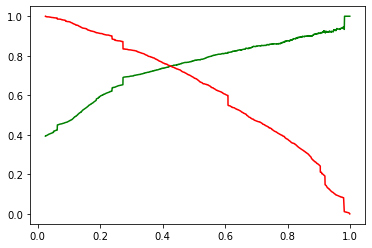

In [151]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [158]:
# Choosing the cut off based on the Client needs and by looking at the graph
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.556330,8823,1,56.0,1,1,1,1,1,1,0,0,0,0,1
1,0,0.050480,7671,0,5.0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.762488,1371,1,76.0,1,1,1,1,1,1,1,1,0,0,1
3,0,0.062411,3143,0,6.0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.070581,1376,0,7.0,1,0,0,0,0,0,0,0,0,0,0


In [159]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8046749919948767

In [160]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3137,  735],
       [ 485, 1889]], dtype=int64)

In [161]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [162]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7198932926829268

In [163]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7957034540859309

Comments-<br>
         - With the current cut off of 0.36, the Precision is around 72% and the Recall is around 80% which seems nice.

## Prediction on Test Data

In [164]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
# Using 'Lead Number' as an index position
y_pred_final['Lead Number'] = y_test.index
y_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.272742,6732
1,0,0.308777,6828
2,0,0.116936,7751
3,0,0.159057,279
4,1,0.830183,4742


In [165]:
# Making prediction using cut off 0.36
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final['Lead Score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100,0))
y_pred_final

,Converted,Conversion_Prob,Lead Number,final_predicted,Lead Score
0,0,0.272742,6732,0,27.0
1,0,0.308777,6828,0,31.0
2,0,0.116936,7751,0,12.0
3,0,0.159057,279,0,16.0
4,1,0.830183,4742,1,83.0
...,...,...,...,...,...
2673,0,0.794059,124,1,79.0
2674,0,0.031417,2003,0,3.0
2675,1,0.186146,2147,0,19.0
2676,0,0.191942,1330,0,19.0


In [166]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7793129200896192

In [167]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1315,  368],
       [ 223,  772]], dtype=int64)

In [168]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [169]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.6771929824561403

In [170]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7758793969849246

Comments-<br>
        - It can be seen that with the cut off of 0.36, the Precision on Test Data is around 68% and Recall is around 78% which seems fair.


# Conclusion and Recommendation

### It was found that the variables that mattered the most in the potential buyers are (In descending order) :

-Total Time Spent on Website<br>
-In Lead Origin (Lead Add Form)<br>
-In Lead Source (Olark Chat)<br>
-TotalVisits<br>
-In Last Notable Activity (Email Link Clicked)<br>
-In Last Notable Activity (Olark Chat Conversation)<br>
-In Last Notable Activity (Modified)<br>
-Do Not Email<br>
-In Last Activity (Olark Chat Conversation)<br>
-In Last Notable Activity (Email Opened)<br>
-In Last Notable Activity (Page Visited On Website)<br>




Keeping these in mind the X Education can flourish as they have a very high 
chance to get almost all the potential buyers to change their mind and buy their courses.




